# Cmpe482 HW4

Yasin Almalıoğlu 2015700018

## Trefethen 9.3

### 9.3a

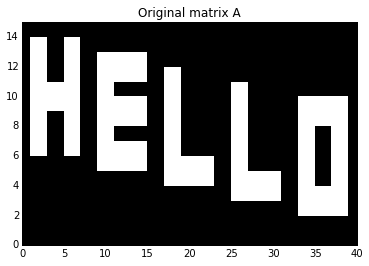

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def create_hello_matrix(m, n):
    A = np.zeros((m, n))
    # H
    A[1:9, (1, 2, 5, 6)] = 1
    A[4:6, 3:5] = 1
    # E
    A[(2, 3, 5, 6, 8, 9), 9:15] = 1
    A[(4, 7), 9:11] = 1
    # L
    A[3:11, 17:19] = 1
    A[9:11, 19:23] = 1
    # L
    A[4:12, 25:27] = 1
    A[10:12, 27:31] = 1
    # O
    A[5:13, (33, 34, 37, 38)] = 1
    A[(5, 6, 11, 12), 35:37] = 1

    return A


m = 15
n = 40
A = create_hello_matrix(m, n)
plt.pcolormesh(np.flipud(A), cmap='gray')
plt.axis('tight')  # Just to remove extra space generated by pcolor
plt.title('Original matrix A')


### 9.3b

Singular values of A: 
[  1.03832691e+01   5.13177886e+00   3.18775603e+00   2.93826395e+00
   2.06251517e+00   1.83760006e+00   1.22698575e+00   9.87917873e-01
   7.37985369e-01   6.32884999e-01   4.90654787e-16   1.22367069e-16
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
Mathematically exact rank of A is:  10


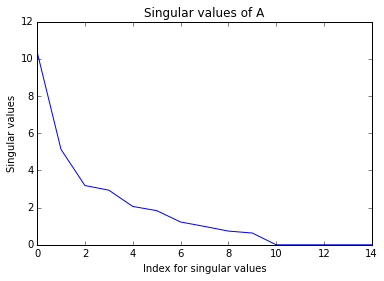

In [4]:
U, s, V = np.linalg.svd(A, full_matrices=1)
print 'Singular values of A: \n', s

plt.figure()
plt.title('Singular values of A')
plt.xlabel('Index for singular values')
plt.ylabel('Singular values')
plt.plot(s)

math_rank_A = np.linalg.matrix_rank(A)
print '\nMathematically exact rank of A is: ', math_rank_A

### 9.3c

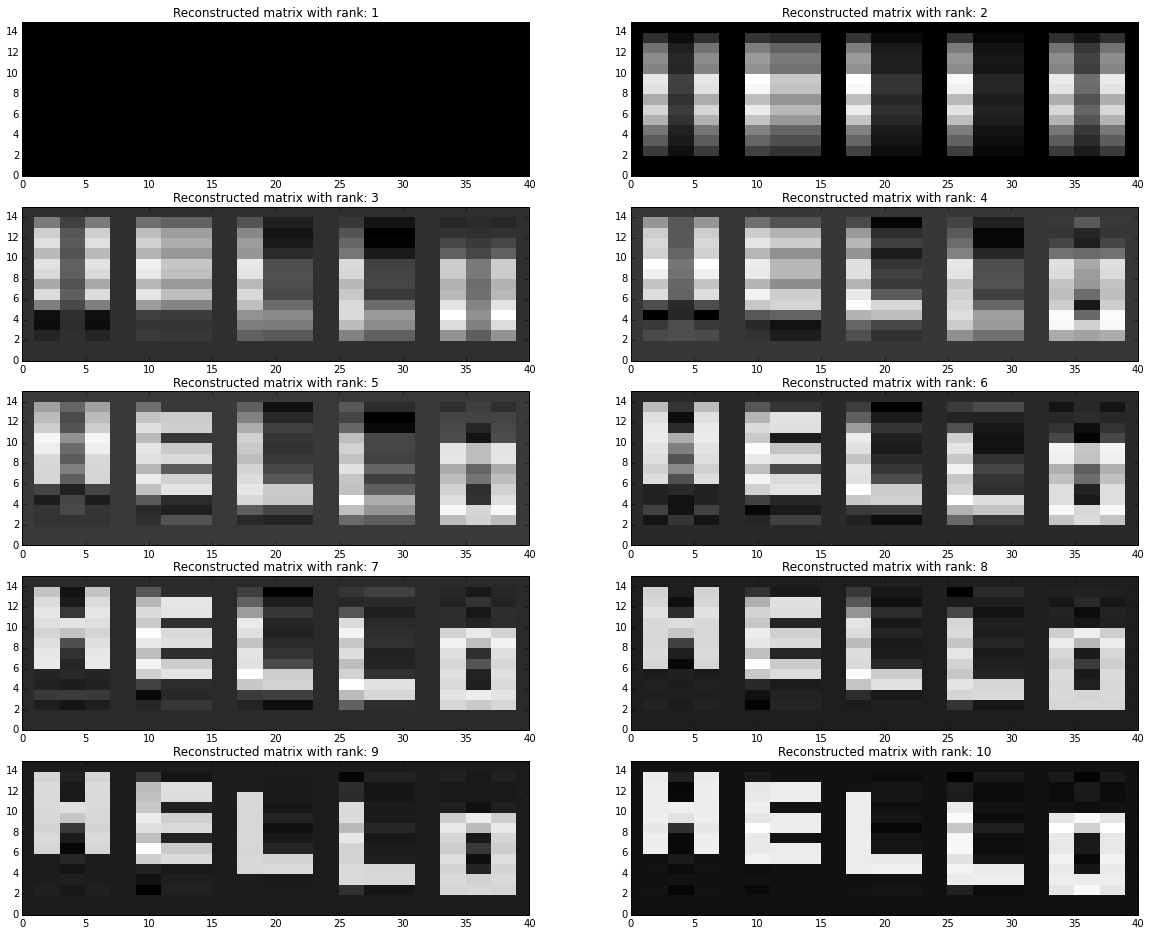

In [10]:
import matplotlib as mpl

plt.figure()
mpl.rcParams['figure.figsize'] = (30.0, 20.0)
for i in range(0, math_rank_A):
    S = np.zeros((m, n))
    S[:i, :i] = np.diag(s[0:i])
    B = np.dot(U, np.dot(S, V))
    plt.subplot(5, 2, i + 1)
    plt.pcolormesh(np.flipud(B), cmap='gray')
    plt.title('Reconstructed matrix with rank: ' + str(i + 1))
    plt.axis('tight')  # Just to remove extra space generated by pcolor

plt.show()

## Trefethen 10.4

### 10.4a

J is clock-wise rotation matrix. (Anti clock-wise version is: $\begin{bmatrix}c & s\\-s & c\end{bmatrix}$. To interpret F easily, let's rewrite it as $ F = J\begin{bmatrix}-1 & 0\\0 & 1\end{bmatrix} $. Thus, it is a reflection through y axis ($e_2$) and a clock-wise rotation. This itself can be also interpreted as a reflection through y axis($e_2$) rotated $\theta/2$.

### 10.4b

QR factorization by Givens rotation

In [11]:
def calculate_givens(a, b):
    r = np.linalg.norm([a, b], 2)
    c_in = a / r
    s_in = b / r
    return c_in, s_in


m2 = 3  # number of rows for matrix in this question
n2 = 4  # number of columns for matrix in this question
D = np.random.rand(m2, n2)
print '\nOriginal matrix to be decomposed is: \n', D
for j in range(0, n2):  # Iterate over columns
    for i in range(m2 - 1, j, -1):  # Iterate over rows
        c, s = calculate_givens(D[i - 1, j], D[i, j])
        D[i - 1:i + 1, j] = np.dot(np.array([[c, s], [-s, c]]), D[i - 1:i + 1, j])

print '\nUpper triangular matrix generated by Givens rotation is: \n', D


Original matrix to be decomposed is: 
[[ 0.38016618  0.46278477  0.60517624  0.02831345]
 [ 0.47301959  0.08453554  0.57135884  0.58344113]
 [ 0.13185751  0.54561796  0.85777359  0.38920459]]

Upper triangular matrix generated by Givens rotation is: 
[[  6.21015508e-01   4.62784774e-01   6.05176241e-01   2.83134496e-02]
 [ -5.55111512e-17   5.52127895e-01   5.71358844e-01   5.83441126e-01]
 [  0.00000000e+00   0.00000000e+00   8.57773589e-01   3.89204590e-01]]


### 10.4c

Multiplication of 2x1 vector by J matrix requires 4 multiplications and 2 additions, 6 flops per row per column. Householder requires 4 flops per row per column as explained in the book. Thus, the Givens method requires 50% more than the Householder method.

## Trefethen 11.3

In [13]:
m3 = 50
n3 = 12
t = np.linspace(0, 1, m3)
b = np.cos(4 * t)
E = np.fliplr(np.vander(t, n3))

# No scientific notation for small numbers. print is much better this way
np.set_printoptions(suppress=True)
np.set_printoptions(precision=16)

Equivalent of MATLAB's \ in Python is np.lstsq()
ref: https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

### 11.3a

In [16]:
xa = np.linalg.lstsq(np.dot(E.transpose(), E), np.dot(E.transpose(), b))[0]
print '\nxa: \n', xa


xa: 
[  1.0000000065530161  -0.0000021655847047  -7.9999140340354966
  -0.0013291744982667  10.6772962045337998  -0.0498208236394185
  -5.5437543628791524  -0.2665518894867205   1.9216803111306475
  -0.1632493987484965  -0.3031187711007635   0.0751204729175133]


### 11.3b

In [15]:
def mgs(A):
    ''' Modified Gram-Schmidt orthogonalization of the
    matrix A = Q*R, where Q is orthogonal and R upper
    is triangular.
    :param A:
    :return: Q and R
    '''

    m, n = A.shape
    R = np.zeros((m, n))
    Q = np.zeros((m, m))
    for i in range(0, n):
        R[i, i] = np.linalg.norm(A[:, i])
        Q[:, i] = A[:, i] / R[i, i]
        for j in range(i + 1, n):
            R[i, j] = np.dot(Q[:, i].transpose(), A[:, j])
            A[:, j] = A[:, j] - R[i, j] * Q[:, i]
    return Q, R


Q3, R3 = mgs(E.copy())
xb = np.linalg.lstsq(R3, np.dot(Q3.transpose(), b))[0]
print '\nxb: \n', xb


xb: 
[  0.999999995166436    0.0000012916837955  -8.0000455457047046
   0.0006277554162319  10.6621922229092778   0.0188143133244473
  -5.7395202692174019   0.0938434077371162   1.493887197206166
   0.1529460236293402  -0.4354740204918648   0.0990840125842467]


### 11.3c

In [17]:
def house(A):
    m, n = A.shape
    Q = np.eye(m)
    for i in range(n - (m == n)):
        H = np.eye(m)
        H[i:, i:] = householder_reflector(A[i:, i])
        Q = np.dot(Q, H)
        A = np.dot(H, A)
    return Q, A


def householder_reflector(a):
    v = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    v[0] = 1
    H = np.eye(a.shape[0])
    H -= (2 / np.dot(v, v)) * np.dot(v[:, None], v[None, :])
    return H


Q4, R4 = house(E)
xc = np.linalg.lstsq(R4, np.dot(Q4.transpose(), b))[0]
print '\nxc: \n', xc


xc: 
[  1.0000000009966032  -0.0000004227430332  -7.9999812356843893
  -0.0003187632485226  10.6694307959753889  -0.0138202881139619
  -5.6470756275360152  -0.0753160231948505   1.693606961436628
   0.0060321106587405  -0.3742417043582039   0.0880405762498528]


### 11.3d

In [18]:
Q5, R5 = np.linalg.qr(E)
xd = np.linalg.lstsq(R5, np.dot(Q5.transpose(), b))[0]
print '\nxd: \n', xd


xd: 
[  1.000000000996609   -0.000000422743035   -7.9999812356845545
  -0.000318763258437   10.6694307961293777  -0.0138202890637977
  -5.647075624329104   -0.0753160297378109   1.6936069697317686
   0.0060321042580948  -0.3742417016031683   0.0880405757422965]


### 11.3e

In [19]:
xe = np.linalg.lstsq(E, b)[0]
print '\nxe: \n', xe


xe: 
[  1.0000000009966099  -0.0000004227430115  -7.999981235685512
  -0.0003187632444721  10.6694307960212402  -0.0138202885659697
  -5.6470756257702694  -0.0753160270473458   1.6936069664979843
   0.0060321066748407  -0.3742417026247216   0.0880405759288649]


### 11.3f

In [20]:
U, s, V = np.linalg.svd(E, full_matrices=False)
S = np.diag(s)
xf = np.dot(V.transpose(), np.linalg.lstsq(S, np.dot(U.transpose(), b))[0])
print '\nxf: \n', xf


xf: 
[  1.0000000009966084  -0.0000004227430364  -7.9999812356844906
  -0.0003187632582019  10.669430796122537   -0.0138202890231785
  -5.6470756244509319  -0.0753160295230136   1.6936069694998799
   0.0060321044089036  -0.374241701657418    0.0880405757505809]


### 11.3g

Compare the residuals, $Ex-b$. The results show that the last four methods yielded the best results. It seems it is a matter of choice, any of the four is winner (certainly not a and b though). The equations seem to be unstable.

In [21]:
print '\nResidual for part a: \n', np.linalg.norm(np.dot(E, xa) - b)
print '\nResidual for part b: \n', np.linalg.norm(np.dot(E, xb) - b)
print '\nResidual for part c: \n', np.linalg.norm(np.dot(E, xc) - b)
print '\nResidual for part d: \n', np.linalg.norm(np.dot(E, xd) - b)
print '\nResidual for part e: \n', np.linalg.norm(np.dot(E, xe) - b)
print '\nResidual for part f: \n', np.linalg.norm(np.dot(E, xf) - b)


Residual for part a: 
3.14683677997e-08

Residual for part b: 
2.7615693686e-08

Residual for part c: 
7.99915519153e-09

Residual for part d: 
7.99915493163e-09

Residual for part e: 
7.99915426268e-09

Residual for part f: 
7.99915447334e-09
